Import data and libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [3]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [5]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [54]:
#import DF

df_list = pd.read_csv(r"C:\Users\18179\Documents\CareerFoundry\Independent Project\02 Data\Raw Data\Listings.csv\Listings.csv", index_col = False)

C:\Users\18179\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
#Import JSON

country_geo = r"C:\Users\18179\Documents\CareerFoundry\Independent Project\02 Data\Raw Data\custom.geo.json"

In [10]:
country_geo

'C:\\Users\\18179\\Documents\\CareerFoundry\\Independent Project\\02 Data\\Raw Data\\custom.geo.json'

In [29]:
#look at the JSON file contents here too:

f = open(r"C:\Users\18179\Documents\CareerFoundry\Independent Project\02 Data\Raw Data\custom.geo.json",)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'scalerank': 1, 'featurecla': 'Admin-0 country', 'labelrank': 6, 'sovereignt': 'Belize', 'sov_a3': 'BLZ', 'adm0_dif': 0, 'level': 2, 'type': 'Sovereign country', 'admin': 'Belize', 'adm0_a3': 'BLZ', 'geou_dif': 0, 'geounit': 'Belize', 'gu_a3': 'BLZ', 'su_dif': 0, 'subunit': 'Belize', 'su_a3': 'BLZ', 'brk_diff': 0, 'name': 'Belize', 'name_long': 'Belize', 'brk_a3': 'BLZ', 'brk_name': 'Belize', 'brk_group': None, 'abbrev': 'Belize', 'postal': 'BZ', 'formal_en': 'Belize', 'formal_fr': None, 'note_adm0': None, 'note_brk': None, 'name_sort': 'Belize', 'name_alt': None, 'mapcolor7': 1, 'mapcolor8': 4, 'mapcolor9': 5, 'mapcolor13': 7, 'pop_est': 307899, 'gdp_md_est': 2536, 'pop_year': -99, 'lastcensus': 2010, 'gdp_year': -99, 'economy': '6. Developing region', 'income_grp': '4. Lower middle income', 'wikipedia': -99, 'fips_10': None, 'iso_a2': 'BZ', 'iso_a3': 'BLZ', 'iso_n3': '084', 'un_a3': '084', 'wb_a2': 'BZ', 'wb_a3': 'BLZ', 'woe_id': -99, 'adm0_a3_is': 

In [55]:
df_list['city'].value_counts()

Paris             64690
New York          37012
Sydney            33630
Rome              27647
Rio de Janeiro    26615
Istanbul          24519
Mexico City       20065
Bangkok           19361
Cape Town         19086
Hong Kong          7087
Name: city, dtype: int64

In [59]:
#Create country column

df_list.loc[df_list['city'] == 'Paris', 'country'] = 'France'
df_list.loc[df_list['city'] == 'New York', 'country'] = 'United States of America'
df_list.loc[df_list['city'] == 'Sydney', 'country'] = 'Australia'
df_list.loc[df_list['city'] == 'Rome', 'country'] = 'Italy'
df_list.loc[df_list['city'] == 'Rio de Janeiro', 'country'] = 'Brazil'
df_list.loc[df_list['city'] == 'Istanbul', 'country'] = 'Turkey'
df_list.loc[df_list['city'] == 'Mexico City', 'country'] = 'Mexico'
df_list.loc[df_list['city'] == 'Bangkok', 'country'] = 'Thailand'
df_list.loc[df_list['city'] == 'Cape Town', 'country'] = 'South Africa'
df_list.loc[df_list['city'] == 'Hong Kong', 'country'] = 'China'

In [60]:
df_list['country'].value_counts()

France                      64690
United States of America    37012
Australia                   33630
Italy                       27647
Brazil                      26615
Turkey                      24519
Mexico                      20065
Thailand                    19361
South Africa                19086
China                        7087
Name: country, dtype: int64

Data Wrangling

In [61]:
#Select necessary columns

columns = ['price',
           'host_total_listings_count',
           'review_scores_rating',
           'review_scores_accuracy',
           'review_scores_cleanliness',
           'review_scores_checkin',
           'review_scores_location',
           'review_scores_value',
           'city',
           'country'
          ]

In [62]:
#create subset

City_rev = df_list[columns]

In [63]:
City_rev.head()

price  host_total_listings_count  review_scores_rating  \
0     53                        1.0                 100.0   
1    120                        1.0                 100.0   
2     89                        1.0                 100.0   
3     58                        1.0                 100.0   
4     60                        1.0                 100.0   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    10.0                       10.0                   10.0   
1                    10.0                       10.0                   10.0   
2                    10.0                       10.0                   10.0   
3                    10.0                       10.0                   10.0   
4                    10.0                       10.0                   10.0   

   review_scores_location  review_scores_value   city country  
0                    10.0                 10.0  Paris  France  
1                    10.0                 10.0  Paris  France  
2                    10.0                 10.0  Paris  France  
3                    10.0                 10.0  Paris  France  
4                    10.0                 10.0  Paris  France

Consistency Check

In [19]:
City_rev.isnull().sum()

price                            0
host_total_listings_count      165
review_scores_rating         91405
review_scores_accuracy       91713
review_scores_cleanliness    91665
review_scores_checkin        91771
review_scores_location       91775
review_scores_value          91785
city                             0
dtype: int64

In [20]:
#impute missing values

City_rev['host_total_listings_count'].fillna(City_rev['host_total_listings_count'].median(), inplace = True)
City_rev['review_scores_rating'].fillna(City_rev['review_scores_rating'].median(), inplace = True)
City_rev['review_scores_accuracy'].fillna(City_rev['review_scores_accuracy'].median(), inplace = True)
City_rev['review_scores_cleanliness'].fillna(City_rev['review_scores_cleanliness'].median(), inplace = True)
City_rev['review_scores_checkin'].fillna(City_rev['review_scores_checkin'].median(), inplace = True)
City_rev['review_scores_location'].fillna(City_rev['review_scores_location'].median(), inplace = True)
City_rev['review_scores_value'].fillna(City_rev['review_scores_value'].median(), inplace = True)

C:\Users\18179\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [21]:
City_rev.isnull().sum()

price                        0
host_total_listings_count    0
review_scores_rating         0
review_scores_accuracy       0
review_scores_cleanliness    0
review_scores_checkin        0
review_scores_location       0
review_scores_value          0
city                         0
dtype: int64

In [68]:
#Clean extreme values

City_rev = City_rev[City_rev['price'] < 1000]

<AxesSubplot:xlabel='review_scores_value', ylabel='Count'>

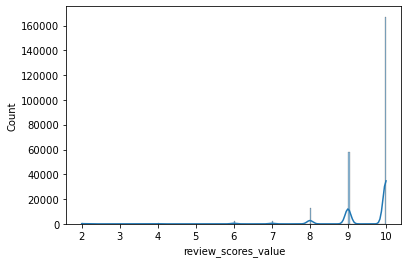

In [23]:
#Check rating

sns.histplot(City_rev['review_scores_value'], bins=200, kde = True)

Plotting Chloropleth

In [69]:
data_to_plot = City_rev[['country','price']]
data_to_plot.head()

country  price
0  France     53
1  France    120
2  France     89
3  France     58
4  France     60

In [70]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['country', 'price'],
    key_on = 'feature.properties.sovereignt',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "price").add_to(map)
folium.LayerControl().add_to(map)

map

The chloropleth map represents the average price within each available country. In order to match the JSON file I created a 
new column with the corresponding country listed to match the host city. Rentals over $1000 per a night were removed. The results show that Hong Kong has the most expensive airbnb listings, followed by Istanbul, Cape Town, and Mexico City.

This map does not answer my hypothesis question regarding total number of host listings to review scores. A more detail JSON file can be loaded and matched to neighborhood coordinates to find patterns in local Airbnb prices. 

In [77]:
#Clean low values, Check rating

City_rev = City_rev[City_rev['review_scores_value'] >= 5]


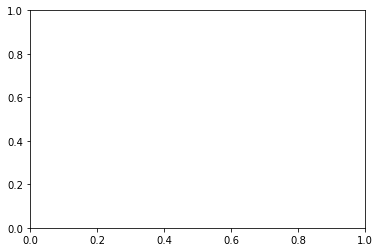

In [83]:
review_plot = sns.histplot(City_rev['review_scores_value'], kde = True)

<AxesSubplot:>

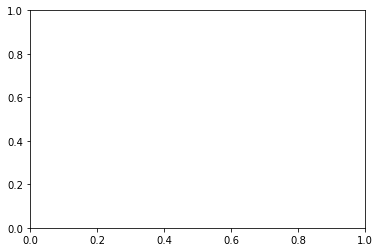

In [81]:
rating_plot = sns.histplot(City_rev['review_scores_rating'], bins=200, kde = True)

In [84]:
data_to_plot_rating = City_rev[['country','review_scores_rating']]
data_to_plot_rating.head()

Empty DataFrame
Columns: [country, review_scores_rating]
Index: []

In [85]:
City_rev.head()

Empty DataFrame
Columns: [price, host_total_listings_count, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_location, review_scores_value, city, country]
Index: []